## <a name ='p8'> Recognizer </a>

Now, we reached the final phase of the project.Here,we will capture a fresh face on our camera and if this person had his face captured and trained before,our recognizer will make a “prediction” returning its id and an index, shown how confident the recognizer is with this match.

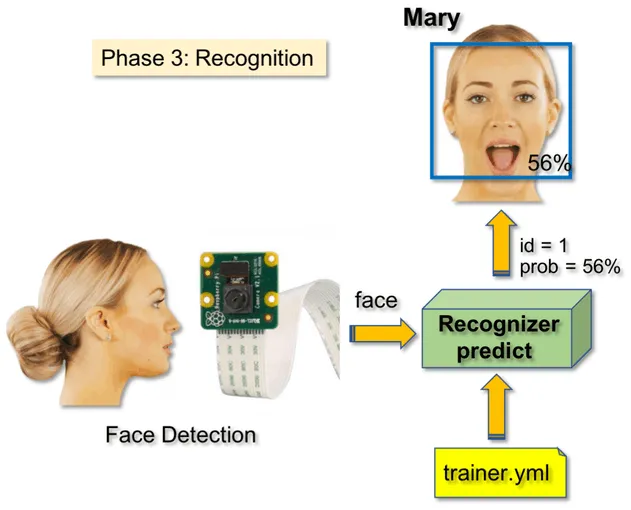

In [9]:
#Importing the necessary library 
import cv2
import numpy as np
import os

In [14]:
#Load the pre-trained LBPH face recognizer from the trainer file 
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('C:/Users/Mintu Adak/Desktop/Face Detection App/trainer/trainer.yml')

#Load the Haar Cascade classifier for the face detection
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

#define the font for text display 
font = cv2.FONT_HERSHEY_SIMPLEX

#define names related to IDs (IDs should match those used during training)
names = ['None','Ashutosh','Mintu','Dhruv','Intaj','Sovan']

#Initialize video capture from the webcam
cam = cv2.VideoCapture(0)
cam.set(3,640) # Set the video width
cam.set(4,480) #set the video length

#Define minimum window size to be recognized as a face 
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

#Main loop for video capture and face recognition
while(True):
    ret , img = cam.read()
    gray =cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    
    #detect faces in the grayscale image
    faces = faceCascade.detectMultiScale(gray,scaleFactor = 1.2 , minNeighbors = 5 , minSize = (int(minW),int(minH) ))
    
    #Loop through detected faces 
    for(x,y,w,h) in faces :
        cv2.rectangle(img, (x,y),(x + w , y + h), (0 , 255, 0), 2)
        
        #Recognize the face by predicting the ID and confidence level
        id, confidence =recognizer.predict(gray[y:y+h,x:x+w])
        
        # Display recognized name and confindence level on the image 
        
        if confidence < 100 :
            id = names[id]
            confidence = " {0}%".format(round(100-confidence))
        else:
            id = "Unknown"
            condidence = " {0}%".format(round(100-confidence))
        
        cv2.putText(img, str(id), (x + 5, y - 5), font , 1 , (255, 255 , 255),2)
        cv2.putText(img, str(confidence), (x + 5, y + h -5) , font , 1 , (255 , 255 , 0) , 1)

    #Display the video feed with recognized faces and text
    cv2.imshow('camera', img)
    
    #check for the 'ESC' key to exit the loop
    k = cv2.waitKey(30) & 0xff
    if k == 27 :
        break

# Cleanup: Release the webcam and destroy any open windows
print("\n [INFO] Exiting Program and cleaning up")
cam.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleaning up
